In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<AxesSubplot:>

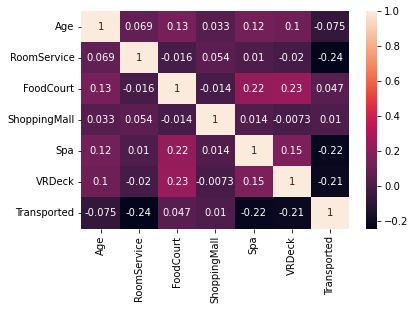

In [4]:
sns.heatmap(train_data.corr(),annot=True)

In [5]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_data1=train_data.copy(deep=True)


In [8]:
data_cleaner=[train_data1,test_data]

In [9]:
PassengerID=test_data.PassengerId

In [10]:
for dataset in data_cleaner:
    dataset["HomePlanet"].fillna(dataset["HomePlanet"].mode()[0], inplace=True)
    dataset["CryoSleep"].fillna(dataset["CryoSleep"].mode()[0], inplace=True)
    dataset["Destination"].fillna(dataset["Destination"].mode()[0], inplace=True)
    dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
    dataset["VIP"].fillna(dataset["VIP"].mode()[0], inplace=True)
    dataset["RoomService"].fillna(dataset["RoomService"].mean(), inplace=True)
    dataset["Spa"].fillna(dataset["Spa"].mean(), inplace=True)
    dataset["VRDeck"].fillna(dataset["VRDeck"].mean(), inplace=True)
    dataset.drop(['FoodCourt','ShoppingMall','Name','PassengerId','Cabin'],axis=1,inplace=True)

In [11]:
test_data.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
RoomService    0
Spa            0
VRDeck         0
dtype: int64

In [12]:
train_data1=pd.get_dummies(data=train_data1,columns=["HomePlanet","CryoSleep","Destination","VIP"],drop_first=True)
test_data=pd.get_dummies(data=test_data,columns=["HomePlanet","CryoSleep","Destination","VIP"],drop_first=True)


In [13]:
Target=train_data1.Transported.astype(int)
train_data1.drop(["Transported"],axis=1,inplace=True)

In [14]:
train_data1

,Age,RoomService,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,1,0,0,0,1,0
1,24.0,109.0,549.0,44.0,0,0,0,0,1,0
2,58.0,43.0,6715.0,49.0,1,0,0,0,1,1
3,33.0,0.0,3329.0,193.0,1,0,0,0,1,0
4,16.0,303.0,565.0,2.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,1643.0,74.0,1,0,0,0,0,1
8689,18.0,0.0,0.0,0.0,0,0,1,1,0,0
8690,26.0,0.0,1.0,0.0,0,0,0,0,1,0
8691,32.0,0.0,353.0,3235.0,1,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_data1)
scaler.transform(train_data1)

array([[ 0.70943692, -0.34058987, -0.27666342, ..., -0.31748665,
         0.65252063, -0.15306307],
       [-0.33671733, -0.1753636 ,  0.2115053 , ..., -0.31748665,
         0.65252063, -0.15306307],
       [ 2.03456565, -0.27540886,  5.69428913, ..., -0.31748665,
         0.65252063,  6.53325471],
       ...,
       [-0.1972301 , -0.34058987, -0.27577423, ..., -0.31748665,
         0.65252063, -0.15306307],
       [ 0.2212316 , -0.34058987,  0.03722284, ..., -0.31748665,
        -1.5325186 , -0.15306307],
       [ 1.05815501, -0.14959437, -0.27666342, ..., -0.31748665,
         0.65252063, -0.15306307]])

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_data1,Target)

C:\Users\akshay.dureja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred=model.predict(test_data)

In [18]:
predictions=pd.DataFrame(pred.astype(bool),columns=['Transported'])

In [19]:
PassengerID

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [22]:
predictions

,Transported
0,True
1,False
2,True
3,True
4,False
...,...
4272,True
4273,False
4274,True
4275,True


In [30]:
submit=pd.concat([PassengerID,predictions],axis=1)

In [33]:
submit.to_csv("output.csv",index=False)